In [1]:
import json
import jsonschema
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def create_add(df, col):
    return df.apply(
        lambda row: row[col]-df[
            df["date"]==row["date"] - pd.Timedelta(1, unit='D')
        ][col].max(),
        axis=1
    )

In [3]:
dfs = []
for month in ["2020.08","2020.09","2020.10","2020.11","2020.12"]:
    with open("data/kpi_hu/{}.json".format(month), 'r') as myfile:
        data_json = json.load(myfile)
        dfs.append(pd.json_normalize(data_json.values()))
df = pd.concat(dfs)
reduced_df = df[["update","tests","infected_pest","infected_other"]].copy()
reduced_df["update"] = pd.to_datetime(reduced_df["update"], format='%Y.%m.%d. %H:%M')
reduced_df["date"] = reduced_df["update"].dt.date
reduced_df["infected"] = reduced_df["infected_pest"]+reduced_df["infected_other"]
reduced_df["add.tests"] = create_add(reduced_df, "tests")
reduced_df["add.infected"] = create_add(reduced_df, "infected")
reduced_df["add.infected/add.tests"] = reduced_df["add.infected"] / reduced_df["add.tests"] * 100
reduced_df.tail()

,update,tests,infected_pest,infected_other,date,infected,add.tests,add.infected,add.infected/add.tests
14,2020-12-14 08:57:00,2320419,35970,158224,2020-12-14,194194,19245.0,1511.0,7.851390
15,2020-12-14 11:23:00,2382632,35970,158224,2020-12-14,194194,81458.0,1511.0,1.854944
16,2020-12-15 08:50:00,2393535,35956,159455,2020-12-15,195411,10903.0,1217.0,11.162065
17,2020-12-16 08:42:00,2406171,36231,161015,2020-12-16,197246,12636.0,1835.0,14.522001
18,2020-12-17 09:07:00,2424533,35861,161196,2020-12-17,197057,18362.0,-189.0,-1.029300


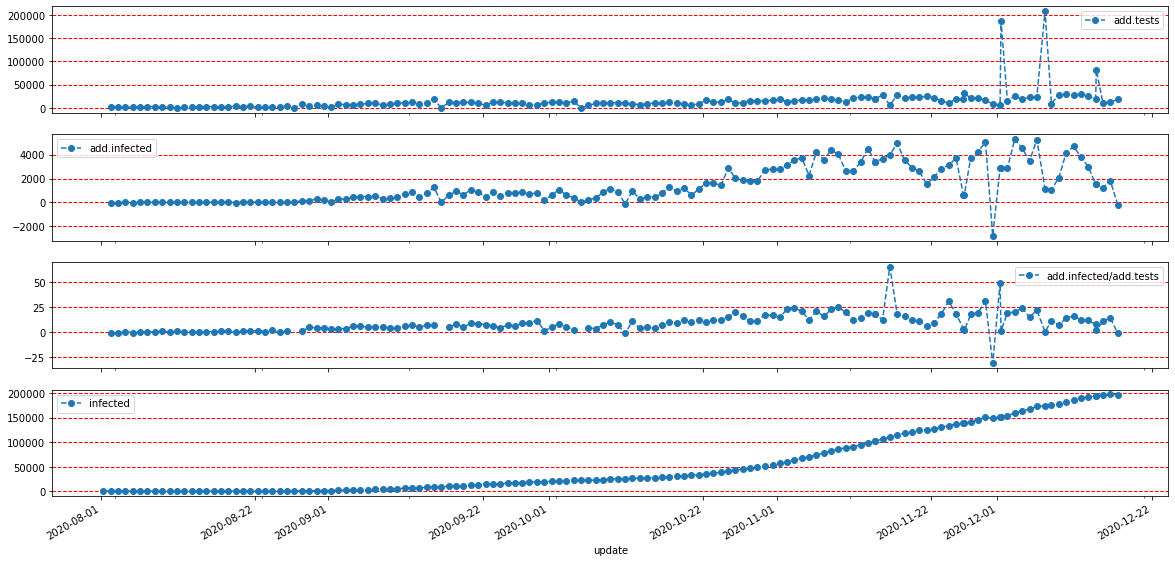

In [4]:
fig, ax = plt.subplots(nrows=4,figsize=(20,10),sharex=True)
#ax[0].set_ylim(0,2100)
#ax[1].set_ylim(1,100)
#ax[1].set_yscale("log")
#ax[2].set_ylim(0,10)
#ax[2].set_yscale("log")
reduced_df.plot(x="update", y="add.tests", ax=ax[0], label="add.tests", style="o--")
reduced_df.plot(x="update", y="add.infected", ax=ax[1], label="add.infected", style="o--")
reduced_df.plot(x="update", y="add.infected/add.tests", ax=ax[2], label="add.infected/add.tests", style="o--")
reduced_df.plot(x="update", y="infected", ax=ax[3], label="infected", style="o--")
ax[0].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[1].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[2].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[3].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
plt.show()